In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data_dir = 'dataset\\'
dir_files = os.listdir(data_dir)
dir_files = list(filter(lambda x: x.endswith(".csv"), dir_files))

for file in dir_files:
    dataset_head = pd.read_csv(data_dir + file)
    print(file)
    print(dataset_head.head(), "\n")

AEP_hourly.csv
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

COMED_hourly.csv
              Datetime  COMED_MW
0  2011-12-31 01:00:00    9970.0
1  2011-12-31 02:00:00    9428.0
2  2011-12-31 03:00:00    9059.0
3  2011-12-31 04:00:00    8817.0
4  2011-12-31 05:00:00    8743.0 

DAYTON_hourly.csv
              Datetime  DAYTON_MW
0  2004-12-31 01:00:00     1596.0
1  2004-12-31 02:00:00     1517.0
2  2004-12-31 03:00:00     1486.0
3  2004-12-31 04:00:00     1469.0
4  2004-12-31 05:00:00     1472.0 

DEOK_hourly.csv
              Datetime  DEOK_MW
0  2012-12-31 01:00:00   2945.0
1  2012-12-31 02:00:00   2868.0
2  2012-12-31 03:00:00   2812.0
3  2012-12-31 04:00:00   2812.0
4  2012-12-31 05:00:00   2860.0 

DOM_hourly.csv
              Datetime  DOM_MW
0  2005-12-31 01:00:00  9389.0
1  2005-12-31 02:00:00  9070.0
2  2005-12-31 03:00:00  9001.0
3

In [3]:
pjm_hourly_est_dataset = pd.read_csv(data_dir + "pjm_hourly_est.csv")
pjm_hourly_est_dataset

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN


In [4]:
# lets examine one of the datasets

ds1 = pd.read_csv(data_dir + "PJME_hourly.csv")
ds1

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [5]:
ds1.dtypes

Datetime     object
PJME_MW     float64
dtype: object

In [6]:
ds1['Datetime'] = pd.to_datetime(ds1['Datetime'])

In [7]:
ds1.dtypes

Datetime    datetime64[ns]
PJME_MW            float64
dtype: object

In [8]:
# set index as 'Datetime' column
ds1.set_index('Datetime', inplace=True)
ds1

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [9]:
# checking duplicate datetimes
print("Unique Dates in our data: ", len(ds1.index.unique()))
print("Total Dates (including duplicates) in our data: ", len(ds1.index))

Unique Dates in our data:  145362
Total Dates (including duplicates) in our data:  145366


In [10]:
# dropping duplicate datetimes and corresponding rows
ds1 = ds1[~ds1.index.duplicated(keep='first')]
print("Unique Dates in our data: ", len(ds1.index.unique()))
print("Total Dates (including duplicates) in our data: ", len(ds1.index))

Unique Dates in our data:  145362
Total Dates (including duplicates) in our data:  145362


In [11]:
# checking missing datetimes
daterange = ds1.index.max() - ds1.index.min()
print("There must be", (daterange.days+1)*24, "index values, but we have only", len(ds1.index), "datetimes")
print("So, we will create", (daterange.days+1)*24-len(ds1.index), "missing indexes and interpolate their corresponding values")

There must be 145392 index values, but we have only 145362 datetimes
So, we will create 30 missing indexes and interpolate their corresponding values


In [12]:
# creating missing index values
new_index = pd.date_range(start = ds1.index.min(), end = ds1.index.max(), freq = 'H')
new_index

DatetimeIndex(['2002-01-01 01:00:00', '2002-01-01 02:00:00',
               '2002-01-01 03:00:00', '2002-01-01 04:00:00',
               '2002-01-01 05:00:00', '2002-01-01 06:00:00',
               '2002-01-01 07:00:00', '2002-01-01 08:00:00',
               '2002-01-01 09:00:00', '2002-01-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', length=145392, freq='H')

In [13]:
# assigning new indexes
ds1 = ds1.reindex(new_index, fill_value=np.nan)
ds1

,PJME_MW
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0
2018-08-02 23:00:00,38500.0


In [14]:
ds1[ds1['PJME_MW'].isna()].sum()

PJME_MW    0.0
dtype: float64

In [15]:
# Interpolating NaN values.
ds1["PJME_MW"] = ds1["PJME_MW"].interpolate()

In [16]:
ds1[ds1['PJME_MW'].isna()].sum()

PJME_MW    0.0
dtype: float64

<AxesSubplot:title={'center':'PJM East'}>

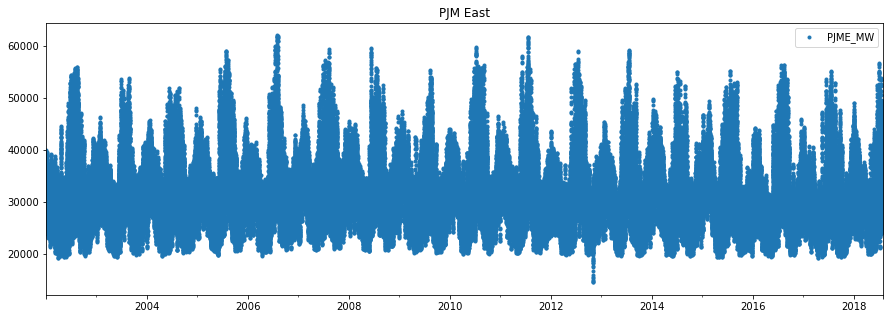

In [17]:
ds1.plot(style='.', figsize=(15,5), title='PJM East') # we want dot plots instead of lines. therefore we've used style='.'

C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
C:\Users\k

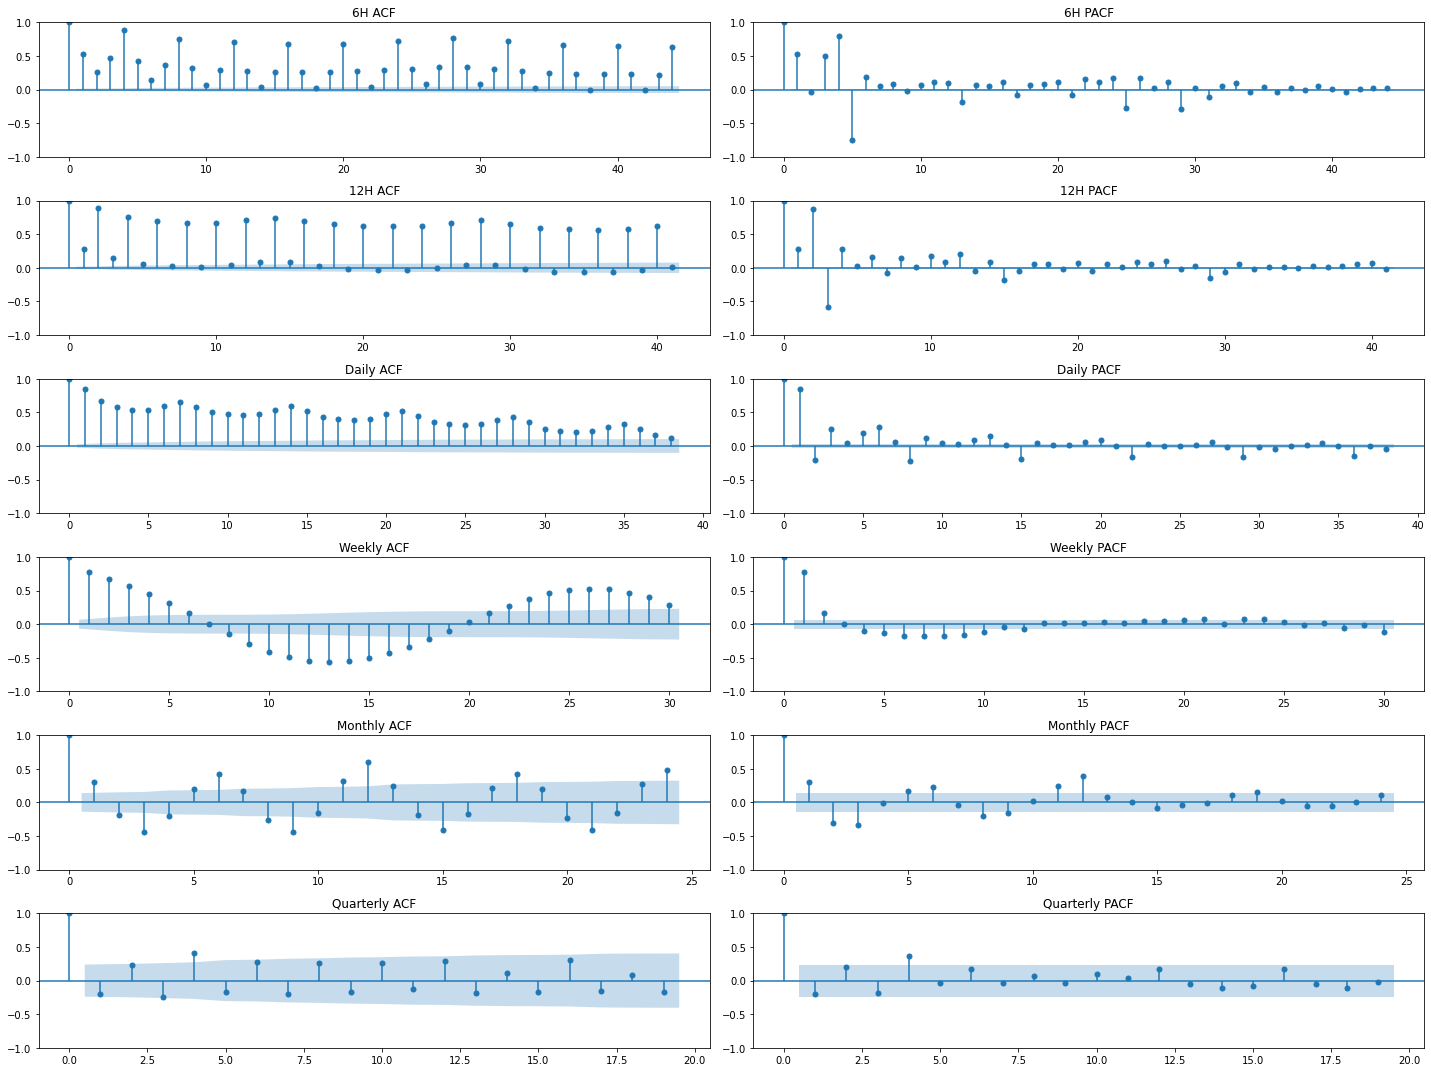

In [18]:
# Analyzing AutoCorrelation and Partial Autocorrelation of Accumulated Time Intervals

def correlation_time_intervals(df):
    df = df.copy()
    df_6H = df.resample('6H').sum()
    df_12H = df.resample('12H').sum()
    df_daily = df.resample('D').sum()
    df_weekly = df.resample('W').sum()
    df_monthly = df.resample('M').sum()
    df_quarterly = df.resample('Q').sum()

    corr_list = [df_6H,
                 df_12H,
                 df_daily,
                 df_weekly,
                 df_monthly,
                 df_quarterly]

    corr_name = {'0': "6H", '1': "12H", '2': "Daily", '3': "Weekly", '4': "Monthly", '5': "Quarterly"}

    fig,axes = plt.subplots(nrows = 6, ncols = 2, figsize=(20,15))

    for x,y in enumerate(corr_list):
            plot_acf((y), ax = axes[x,0], title = corr_name[f'{x}'] + " ACF")
            plot_pacf((y), ax = axes[x,1], title = corr_name[f'{x}'] + " PACF")

    fig.tight_layout()

correlation_time_intervals(ds1)

In [19]:
# Analyzing how the trends are impacted by different time intervals

def create_time_intervals(df, label=None):
    # creating different time intervals with hourly data
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    # assigning these new columns to a new pandas Dataframe (x)
    x = df[['hour',
            'dayofweek',
            'quarter',
            'month',
            'year',
            'dayofyear',
            'dayofmonth',
            'weekofyear']]
    
    # if our dataset contains a column of values corresponding to the relevant time interval, we also want to assign that column to a new pandas Series (y)
    if label:
        y = df[label]
        return x, y
    
    return x

x, y = create_time_intervals(ds1, label='PJME_MW')

# concatenating the time intervals and label in a single dataframe
ds_target = pd.concat([x, y], axis=1) # axis = 1 for column-wise concatenation

C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [20]:
ds_target.isna().sum()

hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
PJME_MW       0
dtype: int64

Text(0.5, 0.98, 'Power Use MW by Hour, Day of Week, Year and Week of Year')

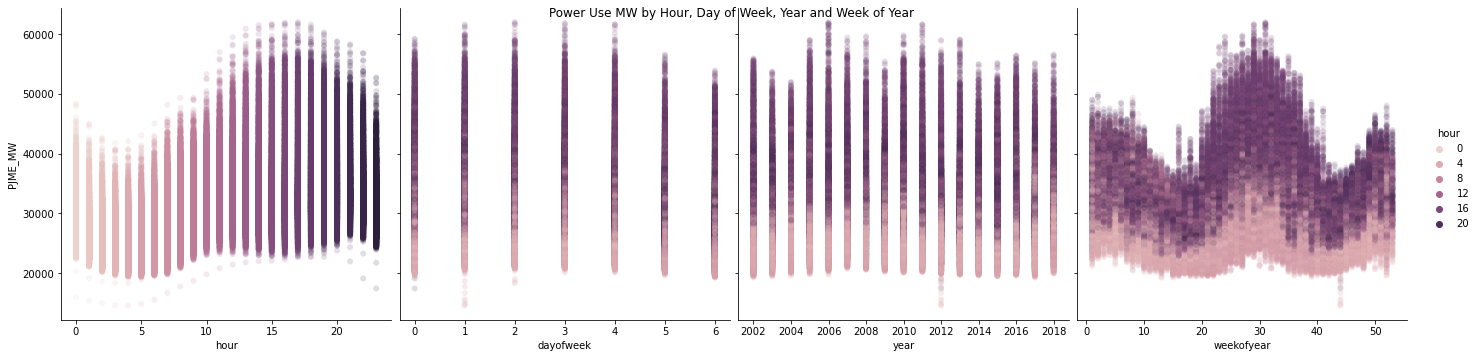

In [21]:
sns.pairplot(data = ds_target, 
             hue = 'hour', 
             x_vars = ['hour','dayofweek','year','weekofyear'], 
             y_vars = 'PJME_MW', 
             height = 5, 
             plot_kws = {'alpha':0.15, 'linewidth':0})

plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')

Text(0.5, 0.98, 'Power Use MW by Hour, Day of Week, Year and Week of Year')

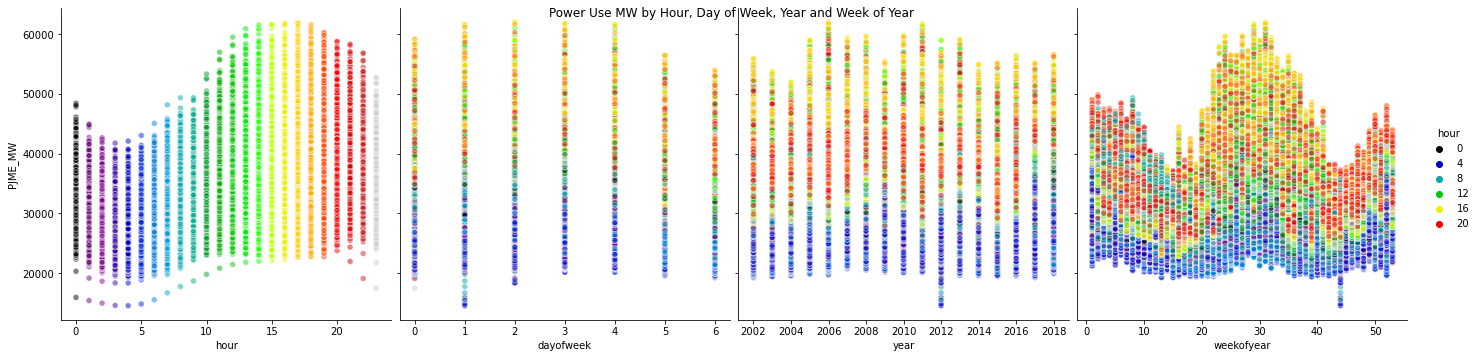

In [22]:
sns.pairplot(data = ds_target, 
             hue = 'hour', 
             palette = 'nipy_spectral',
             x_vars = ['hour','dayofweek','year','weekofyear'], 
             y_vars = 'PJME_MW', 
             height = 5, 
             plot_kws = {'alpha':0.5, 'linewidth':1})

plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')

###### A strong seasonality can be observed in weekofyear and hour plots.

In [23]:
# Creating the model with daily data
# Train/Test Split

ds_new = ds1.resample('6H').sum()

train_size = 0.8 # train_size portion in the dataset

ds_train = ds_new.iloc[:math.floor(len(ds_new)*train_size),:].copy() 
ds_test = ds_new.iloc[math.floor(len(ds_new)*train_size):,:].copy()

In [24]:
print("len(ds_new): ", len(ds_new))
print("len(ds_train): ", len(ds_train))
print("len(ds_test): ", len(ds_test))
print("len(ds_train + ds_test): ", len(ds_train + ds_test))

len(ds_new):  24233
len(ds_train):  19386
len(ds_test):  4847
len(ds_train + ds_test):  24233


<AxesSubplot:title={'center':'PJM East'}>

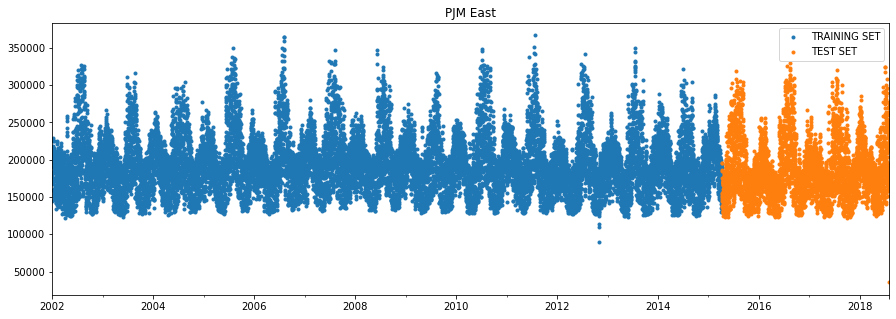

In [25]:
ds_train.rename(columns={'PJME_MW': 'TRAINING SET'}).join(ds_test.rename(columns={'PJME_MW': 'TEST SET'}),how='outer').plot(figsize=(15,5), title='PJM East', style='.')

In [26]:
# Prophet Model
# Format data for prophet model using ds and y
train_new = ds_train.reset_index().rename(columns={'index':'ds','PJME_MW':'y'})
train_new

,ds,y
0,2002-01-01 00:00:00,143971.0
1,2002-01-01 06:00:00,179587.0
2,2002-01-01 12:00:00,183676.0
3,2002-01-01 18:00:00,207623.0
4,2002-01-02 00:00:00,168360.0
...,...,...
19381,2015-04-08 06:00:00,177708.0
19382,2015-04-08 12:00:00,190204.0
19383,2015-04-08 18:00:00,193757.0
19384,2015-04-09 00:00:00,152645.0


In [27]:
model = Prophet()
model.fit(train_new)

In [28]:
# forecasting periods of len(ds_test)
# prophet requires a blank dataframe to input predictions

future = model.make_future_dataframe(periods=len(ds_test), freq='6H') 
future

,ds
0,2002-01-01 00:00:00
1,2002-01-01 06:00:00
2,2002-01-01 12:00:00
3,2002-01-01 18:00:00
4,2002-01-02 00:00:00
...,...
24228,2018-08-02 00:00:00
24229,2018-08-02 06:00:00
24230,2018-08-02 12:00:00
24231,2018-08-02 18:00:00


In [29]:
forecast = model.predict(future)

In [30]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [31]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2002-01-01 00:00:00,154522.212116,129485.139651,180389.196953
1,2002-01-01 06:00:00,183672.750327,157795.570037,210292.595818
2,2002-01-01 12:00:00,204557.613473,177524.202409,231398.051670
3,2002-01-01 18:00:00,205430.683006,179897.131833,230513.645821
4,2002-01-02 00:00:00,154093.334286,125614.732196,179778.227153
...,...,...,...,...
24228,2018-08-02 00:00:00,207395.463169,155185.086703,259828.002144
24229,2018-08-02 06:00:00,235905.699077,184698.050626,290114.988240
24230,2018-08-02 12:00:00,256480.937663,205537.735039,309237.759232
24231,2018-08-02 18:00:00,256970.111326,204631.403101,308599.614503


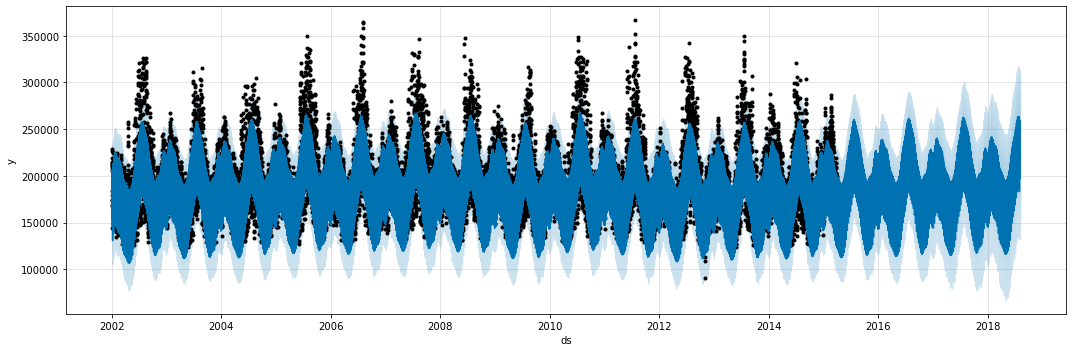

In [32]:
model.plot(forecast, figsize=(15,5));

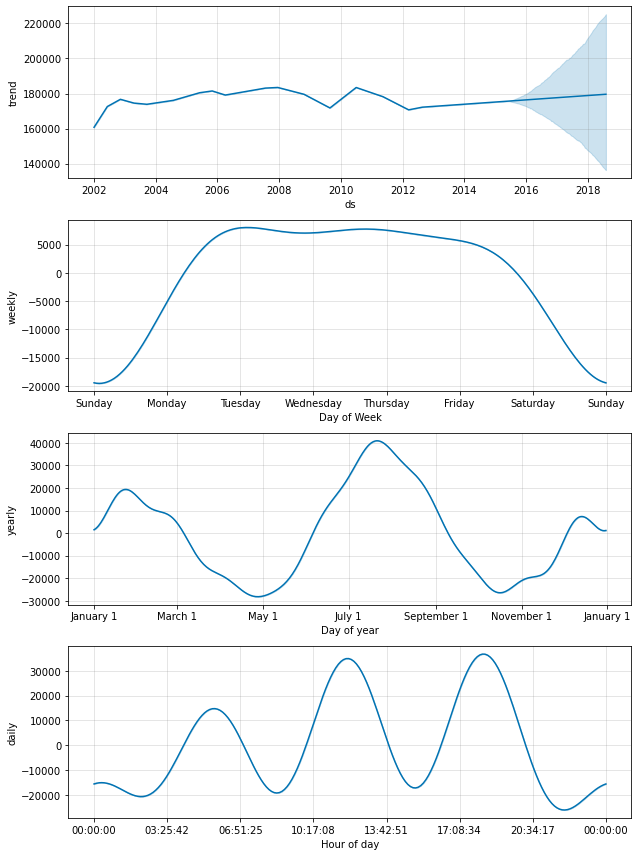

In [33]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
model.plot_components(forecast);

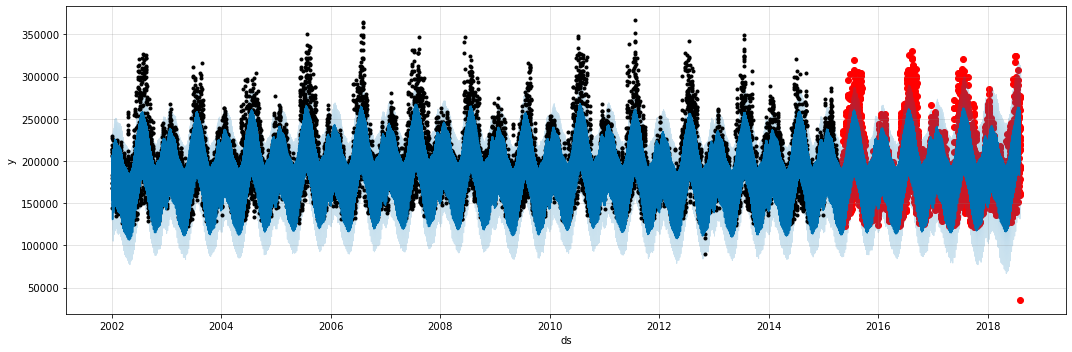

In [34]:
# compare forecast results with actual data
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ds_test.index, ds_test['PJME_MW'], color='r')
fig = model.plot(forecast, ax=ax)